Radar data read functions
==
***

In this notebook, we will explore how to read radar data. The necessary routines are in `pydarn.sdio`

In [1]:
%pylab inline
from davitpy import pydarn
import davitpy.pydarn.sdio
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#the first routine we will call is radDataOpen, which
#establishes a data piepeline.  we will now set up the args.

#sTime is the time we want to start reading (reqd input)
sTime = dt.datetime(2011,1,1,1,0)
print sTime

#rad is the 3-letter radar code for the radar we want (reqd input)
rad='bks'

#NOTE:the rest of the inputs are optional
#eTime is the end time we want to read until
eTime = dt.datetime(2011,1,1,2,0)
print eTime

#channel is the radar channel we want data from
#By default this is set to None.
#Note: For certain radars, like the UAF radars, the channel must
#be explicitly identified such as 'a'.
channel=None

#bmnum is the beam number we want data from.  by default this is
#None, which will read data from all beams
bmnum=7

#cp is the control program id number which we want data from
#by default, this is set to None which reads data from all cpids
cp=None

#fileType specifies the type of data we want.  valid inputs are
#'fitex','fitacf','lmfit','rawacf'.  by default this is 'fitex'
#if a fit type is requested but not found, the code will automatically
#look for other fit types
fileType='fitacf'

#filter is a boolean indicating whether to boxcar filter the data.
#this is onyl valid for fit types, and wont work on mongo data
filtered=False

#src is a string indicating the desired data source.  valid
#inputs are 'mongo','local','sftp'.  by default this is set to
#None which will sequentially try all sources
src=None

2011-01-01 01:00:00
2011-01-01 02:00:00


In [3]:
# Okay, now lets get the data connection
myPtr = pydarn.sdio.radDataOpen(sTime,rad,eTime=eTime,channel=channel,bmnum=bmnum,cp=cp,fileType=fileType,filtered=filtered, src=src)


Looking locally for fitacf files with radcode: bks channel: None
found fitacf data in local files
Concatenating all the files in to one
cat /tmp/sd/20110101.0001.00.bks.fitacf /tmp/sd/20110101.0201.00.bks.fitacf > /tmp/sd/20110101.010000.20110101.020000.bks.fitacf
rm /tmp/sd/20110101.0001.00.bks.fitacf
rm /tmp/sd/20110101.0201.00.bks.fitacf


In [4]:
# Note that the output or radDataOpen is of type radDataPtr
# Let's explore its contents

for key,val in myPtr.__dict__.iteritems():
    print 'myPtr.'+key+' = '+str(val)
    

myPtr.bmnum = 7
myPtr._radDataPtr__fd = 42
myPtr.dType = dmap
myPtr.stid = 33
myPtr.recordIndex = None
myPtr.eTime = 2011-01-01 02:00:00
myPtr.fBeam = None
myPtr.fType = fitacf
myPtr.sTime = 2011-01-01 01:00:00
myPtr._radDataPtr__ptr = <open file '<fdopen>', mode 'r' at 0x5055540>
myPtr._radDataPtr__nocache = False
myPtr._radDataPtr__src = None
myPtr.cp = None
myPtr._radDataPtr__filtered = False
myPtr._radDataPtr__filename = /tmp/sd/20110101.010000.20110101.020000.bks.fitacf
myPtr.channel = None
myPtr.scanStartIndex = None


In [5]:
# Okay, now that we have our radDataPtr, we can use it to read data
# this is done with the command radDataReadRec
# this same command can be used for any type of data

myBeam = pydarn.sdio.radDataReadRec(myPtr)

In [6]:
print myBeam

Beam record FROM: 2011-01-01 01:00:24.789000
bmnum  = 7 
fPtr  = object 
fitex  = None 
fit  = object 
prm  = object 
recordDict  = object 
stid  = 33 
lmfit  = None 
exflg  = None 
iqflg  = None 
offset  = 5075345 
rawacf  = object 
lmflg  = None 
rawflg  = None 
fType  = fitacf 
time  = 2011-01-01 01:00:24.789000 
acflg  = None 
cp  = 153 
iqdat  = object 
fitacf  = None 
channel  = 1 



In [7]:
# The output is of type beamData
# a beamData object can store fit data as well as rawacf and iqdat data
# let's look at the contents of myBeam
for key,val in myBeam.__dict__.iteritems():
    print 'myBeam.'+key+' = '+str(val)

myBeam.bmnum = 7
myBeam.fPtr = radDataPtr: 
bmnum = 7 
_radDataPtr__fd = 42 
dType = dmap 
stid = 33 
recordIndex = None 
eTime = 2011-01-01 02:00:00 
fBeam = None 
fType = fitacf 
sTime = 2011-01-01 01:00:00 
_radDataPtr__ptr = <open file '<fdopen>', mode 'r' at 0x5055540> 
_radDataPtr__nocache = False 
_radDataPtr__src = None 
cp = None 
_radDataPtr__filtered = False 
_radDataPtr__filename = /tmp/sd/20110101.010000.20110101.020000.bks.fitacf 
channel = None 
scanStartIndex = None 

myBeam.fitex = None
myBeam.fit = Fit data: 
pwr0 = [-0.21833011507987976, 0.13968463242053986, 0.30820024013519287, -0.9260621070861816, -1.1514275074005127, -0.5076453685760498, 0.18243050575256348, -0.711816668510437, 9.412342071533203, 16.95236587524414, 17.878822326660156, 12.581954002380371, 17.12259292602539, 9.397078514099121, 8.235315322875977, 13.186558723449707, 11.812653541564941, 7.72720193862915, 1.5565544366836548, 0.47042059898376465, 1.1336286067962646, -0.4580678343772888, 0.22475972771644

In [8]:
# See that the rawacf, fit, and prm attributes are objects
# the rawacf object is empty, since we read fitacf data
# lets look at the prm object
for key,val in myBeam.prm.__dict__.iteritems():
    print 'myBeam.prm.'+key+' = '+str(val)

myBeam.prm.ptab = [0, 9, 12, 20, 22, 26, 27]
myBeam.prm.mplgs = 18
myBeam.prm.nave = 29
myBeam.prm.noisesearch = 21.1200447083
myBeam.prm.scan = 0
myBeam.prm.smsep = 300
myBeam.prm.mplgexs = 0
myBeam.prm.xcf = 1
myBeam.prm.noisesky = 97.9000015259
myBeam.prm.rsep = 45
myBeam.prm.mppul = 7
myBeam.prm.txpl = 300
myBeam.prm.inttsc = 3
myBeam.prm.frang = 180
myBeam.prm.bmazm = -33.9300003052
myBeam.prm.lagfr = 1200
myBeam.prm.ifmode = -1
myBeam.prm.noisemean = 0.0
myBeam.prm.tfreq = 10954
myBeam.prm.inttus = 0
myBeam.prm.rxrise = 100
myBeam.prm.ltab = [[0, 0], [26, 27], [20, 22], [9, 12], [22, 26], [22, 27], [20, 26], [20, 27], [0, 9], [12, 22], [9, 20], [0, 12], [9, 22], [12, 26], [12, 27], [9, 26], [9, 27], [27, 27]]
myBeam.prm.mpinc = 2400
myBeam.prm.nrang = 70


In [9]:
# And lets look at whats in the fit object
for key in myBeam.fit.__dict__.keys():
    print 'myBeam.fit.'+key

myBeam.fit.pwr0
myBeam.fit.slist
myBeam.fit.w_l
myBeam.fit.elv
myBeam.fit.npnts
myBeam.fit.w_l_e
myBeam.fit.p_l
myBeam.fit.phi0_e
myBeam.fit.p_s
myBeam.fit.v_e
myBeam.fit.p_l_e
myBeam.fit.phi0
myBeam.fit.v
myBeam.fit.w_s_e
myBeam.fit.qflg
myBeam.fit.p_s_e
myBeam.fit.gflg
myBeam.fit.nlag
myBeam.fit.w_s


In [10]:
# we can read to the end of the specified time period, like so:
vel, t = [], []
while(myBeam != None):
    vel.append( myBeam.fit.v )
    t.append( myBeam.time )
    myBeam = pydarn.sdio.radDataReadRec(myPtr)


reached end of data


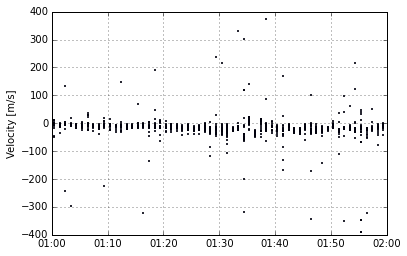

In [11]:
# For instance, we could look at the velocity distribution during that period
ax = gca()
for i in range(len(t)):
    if not vel[i]: continue
    scatter([date2num(t[i])]*len(vel[i]), vel[i], s=1)
ylim([-400, 400])
xlim([date2num(sTime), date2num(eTime)])
tloc = MinuteLocator(interval=10)
tfmt = DateFormatter('%H:%M')
ax.xaxis.set_major_locator(tloc)
ax.xaxis.set_major_formatter(tfmt)
ylabel('Velocity [m/s]')
grid()

In [12]:
# Now, let's try and example where we read rawacf data (this is slow)
myPtr = pydarn.sdio.radDataOpen(sTime,rad,eTime=eTime,channel=channel,bmnum=bmnum,cp=cp,fileType='rawacf',filtered=filtered, src=src)
myBeam = pydarn.sdio.radDataReadRec(myPtr)
print '\n'
for key in myBeam.rawacf.__dict__.keys():
    print 'myBeam.rawacf.'+key


Looking locally for rawacf files with radcode: bks channel: None
found rawacf data in local files
Concatenating all the files in to one
cat /tmp/sd/20110101.0001.00.bks.rawacf /tmp/sd/20110101.0201.00.bks.rawacf > /tmp/sd/20110101.010000.20110101.020000.bks.rawacf
rm /tmp/sd/20110101.0001.00.bks.rawacf
rm /tmp/sd/20110101.0201.00.bks.rawacf


myBeam.rawacf.pwr0
myBeam.rawacf.acfd
myBeam.rawacf.xcfd
myBeam.rawacf.parent


In [13]:
# this is a little dense, so lets look at the ACF just for range gate 0, and the lag table
print myBeam.rawacf.acfd[0]
print myBeam.prm.ltab

[[191.6206817626953, 0.0], [-43.7931022644043, -21.517240524291992], [48.86206817626953, 74.68965148925781], [6.413793087005615, -49.034481048583984], [43.10344696044922, -1.482758641242981], [-53.89655303955078, -132.55172729492188], [-3.2413792610168457, -26.10344886779785], [66.96551513671875, -61.75862121582031], [-19.689655303955078, 36.517242431640625], [20.34482765197754, 70.03448486328125], [-31.931034088134766, 15.793103218078613], [-8.965517044067383, -35.75862121582031], [-43.75862121582031, -74.5862045288086], [1.137930989265442, 16.10344886779785], [38.482757568359375, -42.44827651977539], [-4.758620738983154, 29.413793563842773], [-0.9655172228813171, -34.2068977355957], [753.586181640625, 0.0]]
[[0, 0], [26, 27], [20, 22], [9, 12], [22, 26], [22, 27], [20, 26], [20, 27], [0, 9], [12, 22], [9, 20], [0, 12], [9, 22], [12, 26], [12, 27], [9, 26], [9, 27], [27, 27]]


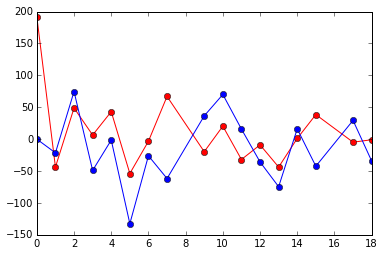

In [14]:
# we can plot this, like so:
import matplotlib.pyplot as plt
lags,re,im = [],[],[]
for i in range(len(myBeam.prm.ltab)-1):
    lags.append(myBeam.prm.ltab[i][1]-myBeam.prm.ltab[i][0])
    re.append(myBeam.rawacf.acfd[0][i][0])
    im.append(myBeam.rawacf.acfd[0][i][1])
fig = plt.figure()
plt.plot(lags,re,'ro-')
plt.plot(lags,im,'bo-')
plt.show()

In [15]:
# And finally, lets try an iqdat file
# THIS IS VERY SLOOOOOW
myPtr = pydarn.sdio.radDataOpen(dt.datetime(2012,1,1,1,0),'fhe',eTime=dt.datetime(2012,1,1,1,30),channel=channel,bmnum=bmnum,cp=cp,fileType='iqdat',filtered=filtered, src=src)
myBeam = pydarn.sdio.radDataReadRec(myPtr)
for key in myBeam.iqdat.__dict__.keys():
    print 'myBeam.iqdat.'+key


Looking locally for iqdat files with radcode: fhe channel: None
found iqdat data in local files
Concatenating all the files in to one
cat /tmp/sd/20120101.0001.00.fhe.iqdat > /tmp/sd/20120101.010000.20120101.013000.fhe.iqdat
rm /tmp/sd/20120101.0001.00.fhe.iqdat
myBeam.iqdat.chnnum
myBeam.iqdat.badtr
myBeam.iqdat.tsze
myBeam.iqdat.skpnum
myBeam.iqdat.seqnum
myBeam.iqdat.smpnum
myBeam.iqdat.tus
myBeam.iqdat.tsc
myBeam.iqdat.intData
myBeam.iqdat.tbadtr
myBeam.iqdat.mainData
myBeam.iqdat.toff
myBeam.iqdat.tnoise
myBeam.iqdat.tatten
myBeam.iqdat.btnum


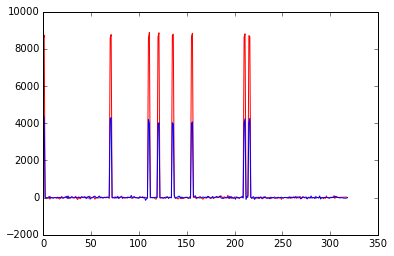

In [16]:
# again this is dense, lets plot a single pulse sequence iqdat
# we can plot this, like so:
samp = []
iq = [[],[]]
for i in range(myBeam.iqdat.smpnum):
    samp.append(i)
    iq[0].append(myBeam.iqdat.mainData[0][i][0])
    iq[1].append(myBeam.iqdat.mainData[0][i][1])
fig = plt.figure()
plt.plot(samp,iq[0],'r-')
plt.plot(samp,iq[1],'b-')
plt.show()


In [ ]:
# this concludes our tutorial on how to read radar data.

# ENJOY!